In [4]:
import os, findspark
home=os.path.expanduser("~")
findspark.init(os.path.join(home,"Developer","spark-2.0.0-bin-hadoop2.6"))

In [5]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [3]:
spark.version

u'2.0.0'

In [4]:
myList=[('1','kim, js',170),
        ('1','lee, sm', 175),
        ('2','lim, yg',180),
        ('2','lee',170)]
myDf=spark.createDataFrame(myList)

In [5]:
myDf.printSchema()
print myDf.take(1)

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)

[Row(_1=u'1', _2=u'kim, js', _3=170)]


In [6]:
print spark.createDataFrame(myList, ['year','name','height']).take(1)

[Row(year=u'1', name=u'kim, js', height=170)]


In [9]:
names = ["kim","lee","lee","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]
df = spark.createDataFrame([(names[i%4], items[i%5]) for i in range(100)],\
                           ["name","item"])
df.show()

+----+----------+
|name|      item|
+----+----------+
| kim|  espresso|
| lee|     latte|
| lee| americano|
| lim|  affocato|
| kim|long black|
| lee|  espresso|
| lee|     latte|
| lim| americano|
| kim|  affocato|
| lee|long black|
| lee|  espresso|
| lim|     latte|
| kim| americano|
| lee|  affocato|
| lee|long black|
| lim|  espresso|
| kim|     latte|
| lee| americano|
| lee|  affocato|
| lim|long black|
+----+----------+
only showing top 20 rows



In [15]:
df.select(df.item.substr(1, 3)).show(2)

+---------------------+
|substring(item, 1, 3)|
+---------------------+
|                  esp|
|                  lat|
+---------------------+
only showing top 2 rows



In [11]:
df.select(df.item.substr(1, 3).alias("3chars")).show(3)

+------+
|3chars|
+------+
|   esp|
|   lat|
|   ame|
+------+
only showing top 3 rows



In [17]:
from pyspark.sql import Row
Person = Row('year','name', 'height')
row1=Person('1','kim, js',170)
print "row1: ",row1.year, row1.name
type(Person)

row1:  1 kim, js


pyspark.sql.types.Row

In [18]:
myRows = [row1,
          Person('1','lee, sm', 175),
          Person('2','lim, yg',180),
          Person('2','lee',170)]

myDf=spark.createDataFrame(myRows)

In [19]:
print myDf.printSchema()
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)

None
+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [21]:
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType
mySchema=StructType([
    StructField("year", StringType(), True),
    StructField("name", StringType(), True),
    StructField("height", IntegerType(), True)
])
myDf=spark.createDataFrame(myRows, mySchema)
myDf.printSchema()
myDf.take(1)
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [22]:
from pyspark.sql import Row

myList=[('1','kim, js',170),('1','lee, sm', 175),('2','lim, yg',180),('2','lee',170)]
myRdd = spark.sparkContext.parallelize(myList)

In [25]:
rddDf=myRdd.toDF()
rddDf.printSchema()
rddDf.show()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)

+---+-------+---+
| _1|     _2| _3|
+---+-------+---+
|  1|kim, js|170|
|  1|lee, sm|175|
|  2|lim, yg|180|
|  2|    lee|170|
+---+-------+---+



In [26]:
rddDf .select([rddDf._1, rddDf._2]).where(rddDf._3 < 175)\
   .show()
rddDf.groupby(rddDf._1).max().show()

+---+-------+
| _1|     _2|
+---+-------+
|  1|kim, js|
|  2|    lee|
+---+-------+

+---+-------+
| _1|max(_3)|
+---+-------+
|  1|    175|
|  2|    180|
+---+-------+



In [27]:
_myRdd=myRdd.map(lambda x:Row(year=int(x[0]),name=x[1],height=int(x[2])))
_myDf=spark.createDataFrame(_myRdd)
_myDf.printSchema()
_myDf.take(1)

root
 |-- height: long (nullable = true)
 |-- name: string (nullable = true)
 |-- year: long (nullable = true)



[Row(height=170, name=u'kim, js', year=1)]

In [33]:
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType, TimestampType
r1=Row(name="js1",age=10)
r2=Row(name="js2",age=20)
_myRdd=spark.sparkContext.parallelize([r1,r2])
_myRdd.collect()

[Row(age=10, name='js1'), Row(age=20, name='js2')]

In [36]:
from pyspark.sql.types import *
myRdd=spark.sparkContext.parallelize([(1, 'kim', 50.0), (2, 'lee', 60.0), (3, 'park', 70.0)])
schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("height", DoubleType(), True)
])
_myDf = spark.createDataFrame(myRdd, schema)
_myDf.printSchema()
_myDf.show()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- height: double (nullable = true)

+---+----+------+
| id|name|height|
+---+----+------+
|  1| kim|  50.0|
|  2| lee|  60.0|
|  3|park|  70.0|
+---+----+------+



In [37]:
myDf.toPandas()

,year,name,height
0,1,"kim, js",170
1,1,"lee, sm",175
2,2,"lim, yg",180
3,2,lee,170


In [38]:
myDf.write.format('com.databricks.spark.csv').save(os.path.join('data','_myDf.csv'))

In [39]:
!ls data/_myDf.csv/

_SUCCESS
part-r-00000-96fdb767-dd4f-4d5e-af79-dd7c523e6578.csv
part-r-00001-96fdb767-dd4f-4d5e-af79-dd7c523e6578.csv
part-r-00002-96fdb767-dd4f-4d5e-af79-dd7c523e6578.csv
part-r-00003-96fdb767-dd4f-4d5e-af79-dd7c523e6578.csv


In [40]:
myDf.toPandas().to_csv(os.path.join('data','myDf.csv'))

In [6]:
_jfname=os.path.join('src','ds_twitter_seoul_3.json')
with open(_jfname, 'rb') as f:
    data = f.readlines()

In [9]:
data = map(lambda x: x.rstrip(), data)
#공백기준으로 오른쪽 제거 right trim 같은느낌

In [10]:
data_json_str = "[" + ','.join(data) + "]"

In [11]:
import pandas as pd

data_df = pd.read_json(data_json_str)

In [12]:
print data_df.count()

contributors                    0
coordinates                    14
created_at                   2000
entities                     2000
extended_entities             973
favorite_count               2000
favorited                    2000
geo                            14
id                           2000
id_str                       2000
in_reply_to_screen_name        40
in_reply_to_status_id          39
in_reply_to_status_id_str      39
in_reply_to_user_id            40
in_reply_to_user_id_str        40
is_quote_status              2000
lang                         2000
metadata                     2000
place                          19
possibly_sensitive           1117
quoted_status                   3
quoted_status_id                7
quoted_status_id_str            7
retweet_count                2000
retweeted                    2000
retweeted_status             1834
source                       2000
text                         2000
truncated                    2000
user          

In [15]:
data_df['id'][:10]

0    873793265719324674
1    873793260711419904
2    873793260568928256
3    873793251093827584
4    873793247004344320
5    873793246639423488
6    873793246295609345
7    873793246186668033
8    873793245796368386
9    873793244450045952
Name: id, dtype: int64

In [16]:
from pyspark.sql import Row
cfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.txt")
lines = spark.sparkContext.textFile(cfile)
parts = lines.map(lambda l: l.split(","))
people = parts.map(lambda p: Row(name=p[0], age=int(p[1].strip())))

_myDf = spark.createDataFrame(people)
_myDf.printSchema()
_myDf.collect()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



[Row(age=29, name=u'Michael'),
 Row(age=30, name=u'Andy'),
 Row(age=19, name=u'Justin')]

In [17]:
%%writefile data/ds_spark.csv
1,2,3,4
11,22,33,44
111,222,333,444

Overwriting data/ds_spark.csv


In [18]:
df = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/ds_spark.csv')
df.show()

+---+---+---+---+
|  1|  2|  3|  4|
+---+---+---+---+
| 11| 22| 33| 44|
|111|222|333|444|
+---+---+---+---+



In [19]:
import numpy as np
np.array([float(x) for x in '1.658985	4.285136'.split('\t')])

array([ 1.658985,  4.285136])

In [20]:
import numpy as np
np.array([float(x) for x in '1.658985 4.285136'.split(' ')])

array([ 1.658985,  4.285136])

In [33]:
from pyspark.sql.types import *
rdd=spark.sparkContext\
    .textFile(os.path.join('data','ds_spark_heightweight.txt'))

tRdd=rdd.map(lambda x:x.split('\t'))
tDf=spark.createDataFrame(tRdd)

In [26]:
tDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)



In [27]:
tDf.take(1)

[Row(_1=u'1', _2=u'65.78', _3=u'112.99')]

In [34]:
tDf=tDf.withColumn("id",tDf['_1'].cast("integer")).drop('_1')
tDf=tDf.withColumn("height",tDf['_2'].cast("double")).drop('_2')
tDf=tDf.withColumn("weight",tDf['_3'].cast("double")).drop('_3')

In [36]:
mySchema = StructType([
    StructField("id", IntegerType(), True),
    StructField("weight", DoubleType(), True),
    StructField("height", DoubleType(), True)
])
myDf=spark.createDataFrame(rdd, mySchema)

In [40]:
myDf.printSchema()

root
 |-- id: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- height: double (nullable = true)



In [42]:
tDf.take(1)

[Row(id=1, height=65.78, weight=112.99)]

In [43]:
#import numpy as np
#myRdd=rdd.map(lambda line:np.array([float(x) for x in line.split('\t')]))
tRdd=rdd.map(lambda line:[float(x) for x in line.split('\t')])
tRdd.take(1)

[[1.0, 65.78, 112.99]]

In [44]:
import numpy as np
tDf=spark.createDataFrame(tRdd,["id","weight","height"])
tDf.printSchema()
tDf.take(1)

root
 |-- id: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- height: double (nullable = true)



[Row(id=1.0, weight=65.78, height=112.99)]

In [45]:
import numpy as np
_weightRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_heightRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
print np.array(_weightRdd)[:5]
print np.array(_heightRdd)[:5]

[ 65.78  71.52  69.4   68.22  67.79]
[ 112.99  136.49  153.03  142.34  144.3 ]


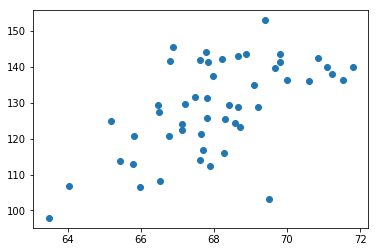

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(_weightRdd), np.array(_heightRdd),'o')
plt.show()

In [47]:
jfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.json")

_myDf= spark.read.json(jfile)
_myDf.filter(_myDf['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+

